# AULA 01 - Introdução à Ciência de Dados e K-NN!

Você pode entrar em contato comigo por [github](https://github.com/jonathangouvea), [e-mail](jonathangouveasilva@gmail.com) ou por Telegram @jonathangouvea

O **PANDA** é o Grupo de Processamento e Análise de Dados. Estudamos sobre Data Science, e o grupo é feito de alunos para alunos e, além de aulas, vamos contar com competições, discussões e muito mais.

Teremos algoritmos de ML explicados, como trabalhar com diferentes conjuntos de dados, construir gráficos explicativos, trabalhar com imagens, redes neurais e mais.

## Alguns conceitos importantes

### Inteligência Artificial

Um conceito muito amplo, que conta com todas as tarefas computacionais que pensávamos que só um ser humano seria capaz de realizar, como jogar xadrez, reconhecer faces de pessoas ou identificar padrões nas compras de um grupo de pessoas.

### Aprendizado de Máquina

São todos os algoritmos em que uma máquina aprende a partir de exemplos do passado, sem regras explícitas

### Deep Learning

Abordagem específica de Aprendizado de Máquina, que usa Redes Neurais profundas

### Data Science

É uma ciência multidisciplinar, que envolve a matemática e estatística, na criação de modelos, a computação, para construir algoritmos eficientes e armazenar dados, e conhecimentos gerais do domínio, com os quais podemos fazer perguntas aos dados e obter respostas relevantes

## Bibliotecas importantes

### Numpy

Responsável por diversas operações com vetores e matrizes, como média, covariância ou transposição de matrizes, de forma computacionalmente muito rápida.

In [0]:
import numpy as np



### Scikit-Learn

Nossa principal biblioteca, contém algoritmos de Machine Learning e muitas funções úteis. Aqui estamos carregando a parte responsável por conter algumas bases de dados

In [0]:
from sklearn import datasets

### Matplotlib

Biblioteca para desenhar gráficos na tela. A segunda linha faz com que esses gráficos fiquem aqui no Colab, e não em outra tela.

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

## Exploração dos dados

Nós usaremos uma base de dados de vinhos! Ela vem do Scikit-Learn e ela pode ser carregado com *load_wine*

Em seguida nós damos uma olhada nessa base.



In [0]:
VINHOS = datasets.load_wine()
VINHOS

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

A descrição dos dados diz muito sobre essa base! Sabemos que temos 178 amostras, com 13 atributos e temos a informação sobre todos esses.

Temos 3 classes, o que significa que temos três tipos de vinhos diferentes. Também observamos informações sobre o mínimo, máximo, média e desvio padrão dos dados.

In [0]:
print(VINHOS.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

Aqui temos os atributos dos vinhos, os guardamos nessa variável para ficarem de fácil acesso.

In [0]:
nome_atributos = VINHOS.feature_names
nome_atributos

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Aqui dividimos em X os dados dos atributos e em y as informações das classes e desenhamos um simples histograma sobre as informações dos vinhos.

In [0]:
X = VINHOS.data
y = VINHOS.target

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

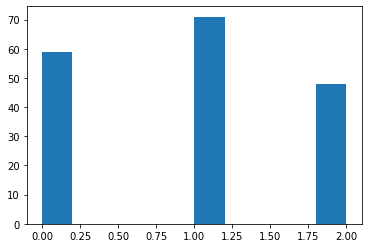

In [0]:
plt.hist(y)

### Análise gráfica

Agora nós fazemos um gráfico de pontos comparando o Teor alcólico e a Intensidade de cor dos vinhos. Nós separamos as cores de acordo com a classe dos vinhos e usamos marcadores pequenos.

Text(0, 0.5, 'Intensidade de cor')

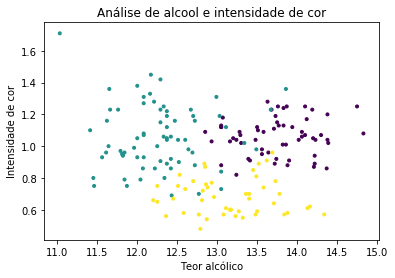

In [0]:
plt.scatter(X[:, 0], X[:, 10], c=y, cmap="viridis", marker='.')
plt.title("Análise de alcool e intensidade de cor")
plt.xlabel("Teor alcólico")
plt.ylabel("Intensidade de cor")

Em seguida temos uma análise de covariância, em que um valor alto indicado atributos diretamente proporcionais, uma valor muito negativo indiretamente proporcionais enquanto um valor próximo de zero indica falta de correlação.

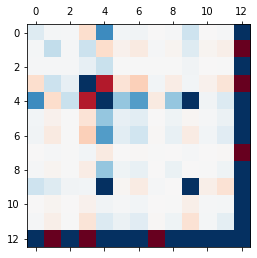

In [0]:
X_corr = np.cov(X.T)

plt.matshow(X_corr, vmin = -5, vmax = 5,cmap="RdBu")

## K-Nearest Neighbours

Esse algoritmo é muito interessante! Ele funciona assim, quando queremos testar um dado, nós medimos a distância dele com todos os dados, e pegamos os K dados mais próximos e verificamos a que classe, ou vinho nesse caso, eles pertencem! A predição é da classe mais comum.

O valor de K não pode ser determinado sem testes, e o melhor valor depende de cada base de dados. Experimente testar vários valores de K!

Uma parte essencial de qualquer classificação é dividir nossa base em **Treino** e **Teste**, e essas duas partes **NUNCA** devem se misturar.

Nesse caso, chegamos a 74,07% de acurácia.


In [0]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7407407407407407

## Escalonamento

Trabalhar com **dados não escalonados** é um grande erro que muitos cientistas de dados cometem! Em nosso caso, existiam atributos com valores gigantes e alguns microscópicos, isso gera um problema bem grande quando trabalhamos com distâncias!

Por isso, aqui escalonamos nossos dados e verificamos a correlação! Percebemos que temos um resultado bem mais legal agora! Também vemos que os gráficos normais de pontos não tem mudança no seu comportamento, só na escala mesmo!

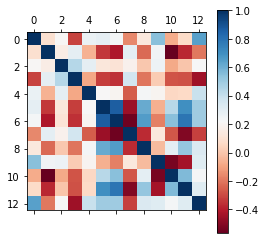

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_escalonado = scaler.fit_transform(X)

X_corr = np.cov(X_escalonado.T)
plt.matshow(X_corr, cmap='RdBu')
plt.colorbar()

Text(0, 0.5, 'Intensidade de cor')

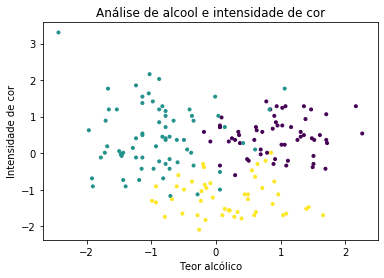

In [0]:
plt.scatter(X_escalonado[:, 0], X_escalonado[:, 10], c=y, cmap="viridis", marker='.')
plt.title("Análise de alcool e intensidade de cor")
plt.xlabel("Teor alcólico")
plt.ylabel("Intensidade de cor")

Agora testando o KNN novamente, chegamos a uma acurácia **MUITO** maior! Cerca de 96%

In [0]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_escalonado, y, test_size=0.3, random_state = 42)

knn = neighbors.KNeighborsClassifier(3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9629629629629629

## Outras métricas

Além disso, existem outras métricas muito importantes!

A **precisão** leva em conta o quanto acertamos, isso é, dentre todas as classificações que o modelo fez, quantas estão corretas.

O **Recall** ou **Sensibilidade** leva em conta dentre todas as rotulações esperada de uma classe, quantas estão corretas.

O **F-1 Score** representa uma média harmônica das duas medidas anteriores.

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn.predict(X_test), target_names=['Vinho 0', 'Vinho 1', 'Vinho 2']))

              precision    recall  f1-score   support

     Vinho 0       0.95      1.00      0.97        19
     Vinho 1       1.00      0.90      0.95        21
     Vinho 2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

